## Importations

In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sql
import configparser
import datetime
import seaborn as sns
import matplotlib.pyplot as plt 


Bad key "text.kerning_factor" on line 4 in
/home/ubuntu/anaconda3/envs/analytics/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Configuration

In [2]:
config = configparser.ConfigParser()
config.read('../config/default.ini')

['../config/default.ini']

In [3]:
engine = sql.create_engine('postgresql://{}:{}@{}:{}/{}'.format(config['DATABASE']['username'], config['DATABASE']['password'].replace('_percentage_', '%'), config['DATABASE']['host'], config['DATABASE']['port'], config['DATABASE']['database']))

## Utilitaires

In [4]:
def export_df(df, name):
    df.to_csv('output/{}_{}.csv'.format(datetime.datetime.strftime(datetime.datetime.now(), '%y%m%d'), name), index=False, encoding='utf-8-sig')

## Constants

In [5]:
original_columns = ['only_live_or_video', 'only_livepreview','live_or_video_and_livepreview']

## Données

In [67]:
df_connected_track = pd.read_csv('../scripts/output/201001_connected_users.csv')
df_connected_track['date'] = df_connected_track['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_connected_track = df_connected_track.groupby('date').sum().reset_index().sort_values(by='date')
df_connected_track['input'] = 'MVH'

In [68]:
df_connected_beat = pd.read_csv('../scripts/output/201001_test_connected_users.csv')
df_connected_beat['date'] = df_connected_beat['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_connected_beat = df_connected_beat.groupby('date').sum().reset_index().sort_values(by='date')
df_connected_beat['input'] = 'BEAT'

In [69]:
df_not_connected_track = pd.read_csv('../scripts/output/201001_not_connected_users.csv')
df_not_connected_track['date'] = df_not_connected_track['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_not_connected_track = df_not_connected_track.groupby('date').sum().reset_index().sort_values(by='date')
df_not_connected_track['input'] = 'MVH'

In [70]:
df_not_connected_beat = pd.read_csv('../scripts/output/201001_test_not_connected_users.csv')
df_not_connected_beat['date'] = df_not_connected_beat['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_not_connected_beat = df_not_connected_beat.groupby('date').sum().reset_index().sort_values(by='date')
df_not_connected_beat['input'] = 'BEAT'

In [71]:
con_rename = {}
for col in original_columns:
    con_rename[col] = 'connected_user_{}'.format(col)
    con_rename['rm_{}'.format(col)] = 'rm_connected_user_{}'.format(col)
con_rename

{'only_live_or_video': 'connected_user_only_live_or_video',
 'rm_only_live_or_video': 'rm_connected_user_only_live_or_video',
 'only_livepreview': 'connected_user_only_livepreview',
 'rm_only_livepreview': 'rm_connected_user_only_livepreview',
 'live_or_video_and_livepreview': 'connected_user_live_or_video_and_livepreview',
 'rm_live_or_video_and_livepreview': 'rm_connected_user_live_or_video_and_livepreview'}

In [72]:
not_con_rename = {}
for col in original_columns:
    not_con_rename[col] = 'not_connected_user_{}'.format(col)
    not_con_rename['rm_{}'.format(col)] = 'rm_not_connected_user_{}'.format(col)
not_con_rename

{'only_live_or_video': 'not_connected_user_only_live_or_video',
 'rm_only_live_or_video': 'rm_not_connected_user_only_live_or_video',
 'only_livepreview': 'not_connected_user_only_livepreview',
 'rm_only_livepreview': 'rm_not_connected_user_only_livepreview',
 'live_or_video_and_livepreview': 'not_connected_user_live_or_video_and_livepreview',
 'rm_live_or_video_and_livepreview': 'rm_not_connected_user_live_or_video_and_livepreview'}

In [73]:
for i,col in enumerate(original_columns):
    df_connected_track['rm_{}'.format(col)] = df_connected_track.iloc[:,i+1].rolling(window=7).mean()
    df_connected_beat['rm_{}'.format(col)] = df_connected_beat.iloc[:,i+1].rolling(window=7).mean()
    df_not_connected_track['rm_{}'.format(col)] = df_not_connected_track.iloc[:,i+1].rolling(window=7).mean()
    df_not_connected_beat['rm_{}'.format(col)] = df_not_connected_beat.iloc[:,i+1].rolling(window=7).mean()
df_connected_track.tail()

date  only_live_or_video  only_livepreview  \
1361 2020-09-25             90916.0            5848.0   
1362 2020-09-26             84150.0            4187.0   
1363 2020-09-27            128969.0            3309.0   
1364 2020-09-28             89146.0            6156.0   
1365 2020-09-29              5621.0             759.0   

      live_or_video_and_livepreview input  rm_only_live_or_video  \
1361                        13348.0   MVH           90718.857143   
1362                         8797.0   MVH           89273.000000   
1363                        11503.0   MVH           92782.571429   
1364                        15865.0   MVH           94101.857143   
1365                          479.0   MVH           82659.714286   

      rm_only_livepreview  rm_live_or_video_and_livepreview  
1361          4630.000000                      13290.857143  
1362          4809.428571                      13289.714286  
1363          4839.428571                      13532.714286  
1364          4863.428571                      13677.000000  
1365          4377.714286                      12115.285714

In [74]:
df_connected_track = df_connected_track.rename(columns=con_rename)
df_connected_beat = df_connected_beat.rename(columns=con_rename)
df_not_connected_track = df_not_connected_track.rename(columns=not_con_rename)
df_not_connected_beat = df_not_connected_beat.rename(columns=not_con_rename)

## Génération avec query de Michael

In [75]:
df_egos_livepreview = pd.read_csv('../scripts/output/201002_egos_livepreview.csv')
df_egos_livepreview = df_egos_livepreview.rename(columns={'t_day':'date'})
df_egos_livepreview['date'] = df_egos_livepreview['date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df_egos_livepreview = df_egos_livepreview.groupby('date').sum().reset_index().sort_values(by='date').sort_values(by='date')
df_egos_livepreview['input'] = 'MIC'
df_egos_livepreview.tail()

date  connected_user_only_live_or_video  \
623 2020-09-27                              83868   
624 2020-09-28                              56043   
625 2020-09-29                              54033   
626 2020-09-30                              65486   
627 2020-10-01                              56607   

     not_connected_user_only_live_or_video  total_only_live_or_video  \
623                                  39986                    123854   
624                                  38669                     94712   
625                                  40065                     94098   
626                                  43022                    108508   
627                                  42251                     98858   

     connected_user_only_livepreview  not_connected_user_only_livepreview  \
623                             4944                                60592   
624                             9715                                73537   
625                             8401                                72028   
626                             8991                                86585   
627                             9475                                91543   

     total_only_livepreview  connected_user_live_or_video_and_livepreview  \
623                   65536                                          8032   
624                   83252                                         11169   
625                   80429                                          7962   
626                   95576                                         11401   
627                  101018                                         10253   

     not_connected_user_live_or_video_and_livepreview input  
623                                              3372   MIC  
624                                              6641   MIC  
625                                              5320   MIC  
626                                              7588   MIC  
627                                              7456   MIC

## Data source Baptiste

In [76]:
df_baptiste = pd.read_csv('../scripts/input/20191108_spf_bada_egos_miniatures_conso.csv')
df_baptiste = df_baptiste.rename(columns={'t_day':'date'})
df_baptiste['date'] = df_baptiste['date'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %H:%M'))
df_baptiste = df_baptiste.groupby('date').sum().reset_index().sort_values(by='date').sort_values(by='date')
df_baptiste['input'] = 'SPF'
df_baptiste.head()

date  connected_user_only_live_or_video  \
0 2017-07-24                              16365   
1 2017-07-25                              14040   
2 2017-07-26                              13026   
3 2017-07-27                              12309   
4 2017-08-01                              11889   

   not_connected_user_only_live_or_video  connected_user_only_livepreview  \
0                                  67499                                0   
1                                  73973                                0   
2                                  66253                                0   
3                                  65045                                0   
4                                  66390                                0   

   not_connected_user_only_livepreview  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   connected_user_live_or_video_and_livepreview  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   not_connected_user_live_or_video_and_livepreview  Unnamed: 7  Unnamed: 8  \
0                                                 0         0.0         0.0   
1                                                 0         0.0         0.0   
2                                                 0         0.0         0.0   
3                                                 0         0.0         0.0   
4                                                 0         0.0         0.0   

   Unnamed: 9  total_only_live_or_video  total_only_livepreview input  
0         0.0                     83864                       0   SPF  
1         0.0                     88013                       0   SPF  
2         0.0                     79279                       0   SPF  
3         0.0                     77354                       0   SPF  
4         0.0                     78279                       0   SPF

In [77]:
for col in df_baptiste.columns: 
    if 'Unnamed' in col:
        del df_baptiste[col]

In [78]:
columns = ['connected_user_only_live_or_video','connected_user_only_livepreview','connected_user_live_or_video_and_livepreview','not_connected_user_only_live_or_video','not_connected_user_only_livepreview','not_connected_user_live_or_video_and_livepreview']

In [79]:
rm_columns = ['rm_{}'.format(col) for col in columns]

In [80]:
for i,col in enumerate(columns):
    df_egos_livepreview['rm_{}'.format(col)] = df_egos_livepreview.iloc[:,i+1].rolling(window=7).mean()
    df_baptiste['rm_{}'.format(col)] = df_baptiste.iloc[:,i+1].rolling(window=7).mean()
df_baptiste.head()    

date  connected_user_only_live_or_video  \
0 2017-07-24                              16365   
1 2017-07-25                              14040   
2 2017-07-26                              13026   
3 2017-07-27                              12309   
4 2017-08-01                              11889   

   not_connected_user_only_live_or_video  connected_user_only_livepreview  \
0                                  67499                                0   
1                                  73973                                0   
2                                  66253                                0   
3                                  65045                                0   
4                                  66390                                0   

   not_connected_user_only_livepreview  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   connected_user_live_or_video_and_livepreview  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   not_connected_user_live_or_video_and_livepreview  total_only_live_or_video  \
0                                                 0                     83864   
1                                                 0                     88013   
2                                                 0                     79279   
3                                                 0                     77354   
4                                                 0                     78279   

   total_only_livepreview input  rm_connected_user_only_live_or_video  \
0                       0   SPF                                   NaN   
1                       0   SPF                                   NaN   
2                       0   SPF                                   NaN   
3                       0   SPF                                   NaN   
4                       0   SPF                                   NaN   

   rm_connected_user_only_livepreview  \
0                                 NaN   
1                                 NaN   
2                                 NaN   
3                                 NaN   
4                                 NaN   

   rm_connected_user_live_or_video_and_livepreview  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

   rm_not_connected_user_only_live_or_video  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   rm_not_connected_user_only_livepreview  \
0                                     NaN   
1                                     NaN   
2                                     NaN   
3                                     NaN   
4                                     NaN   

   rm_not_connected_user_live_or_video_and_livepreview  
0                                                NaN    
1                                                NaN    
2                                                NaN    
3                                                NaN    
4                                                NaN

In [81]:
df_all = df_egos_livepreview.copy()
df_all = df_all.append(df_baptiste, ignore_index=True)
df_all = df_all.append(df_connected_track, ignore_index=True)
df_all = df_all.append(df_not_connected_track, ignore_index=True)

In [19]:
df_all = df_baptiste.copy()
df_all = df_all.append(df_connected_track, ignore_index=True)
df_all = df_all.append(df_connected_beat, ignore_index=True)
df_all = df_all.append(df_not_connected_track, ignore_index=True)
df_all = df_all.append(df_not_connected_beat, ignore_index=True)

In [20]:
df_all['input'].unique()

array(['SPF', 'TRACK', 'BEAT'], dtype=object)

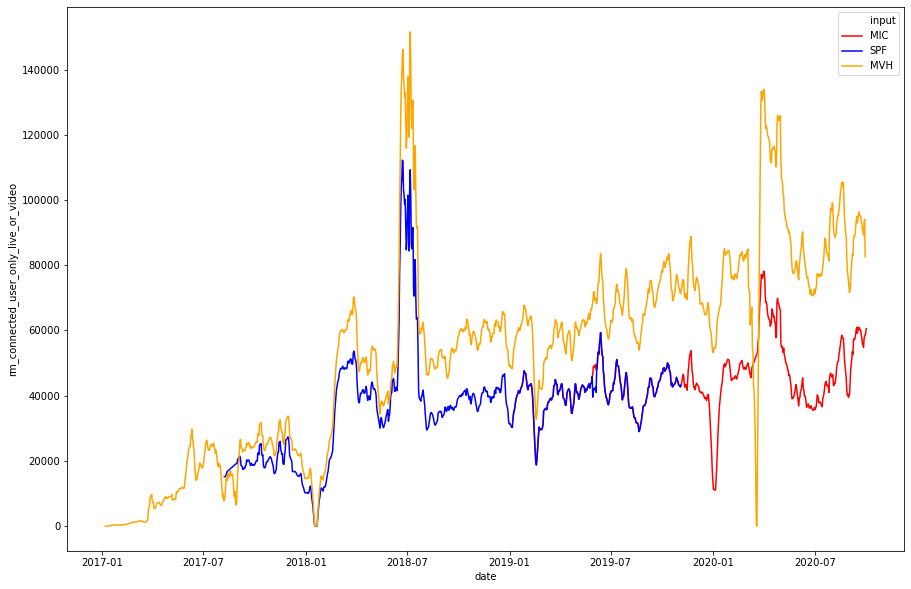

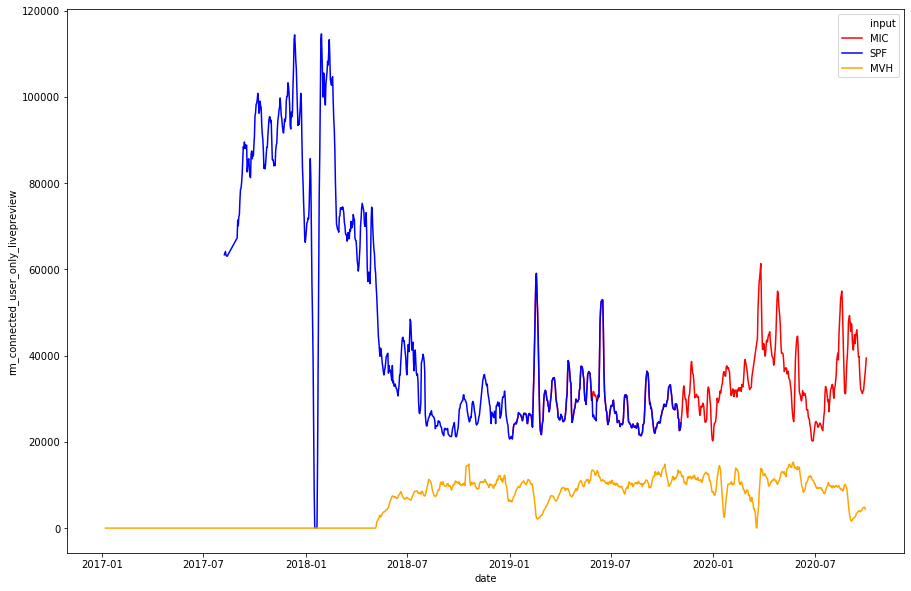

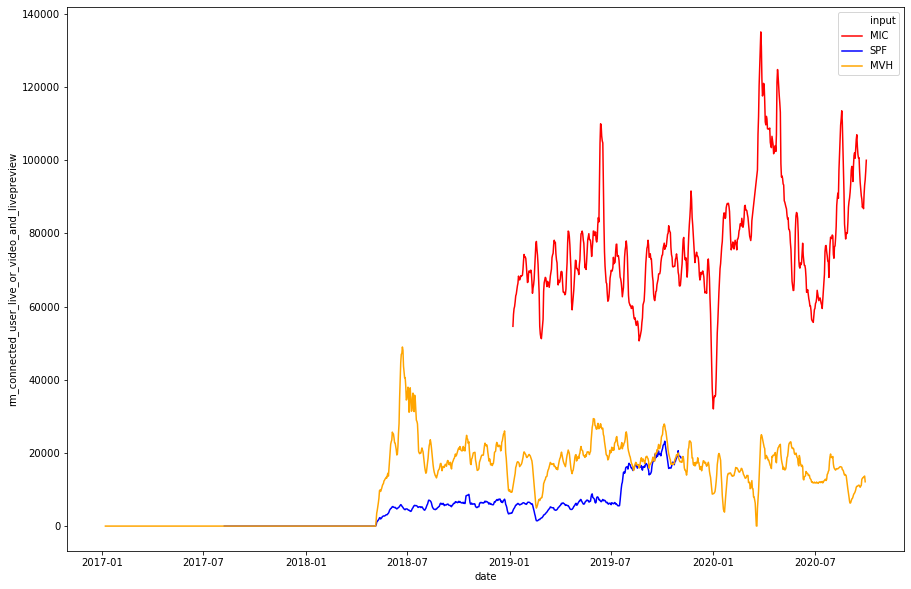

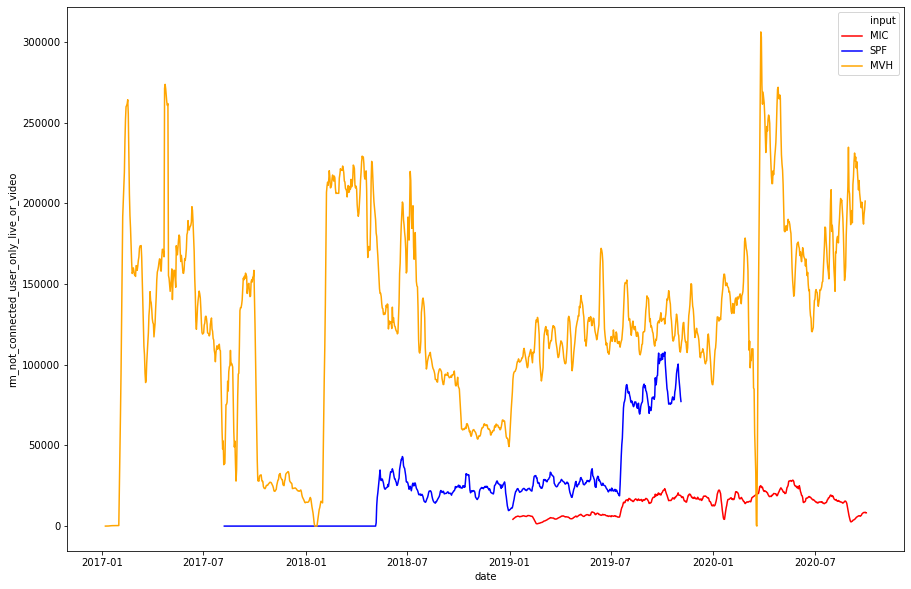

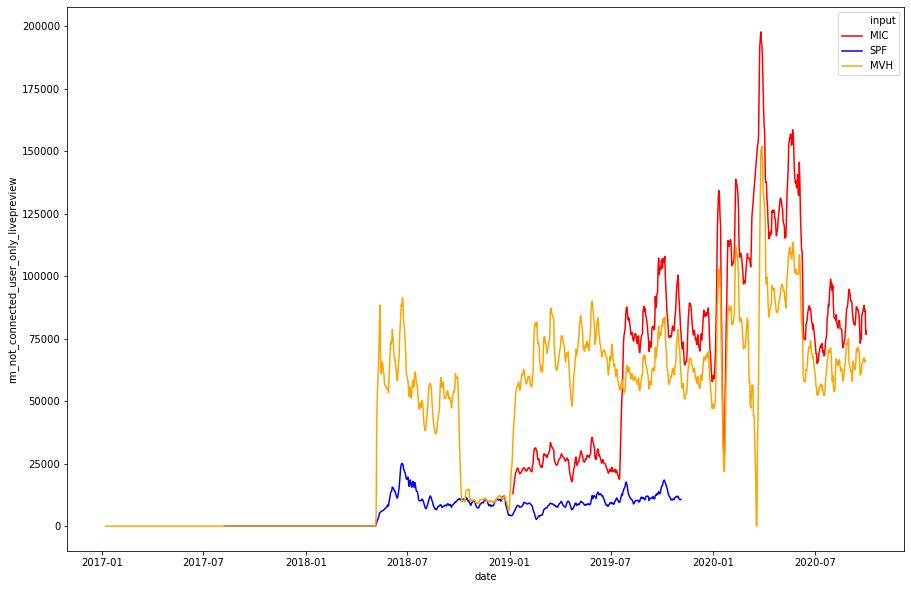

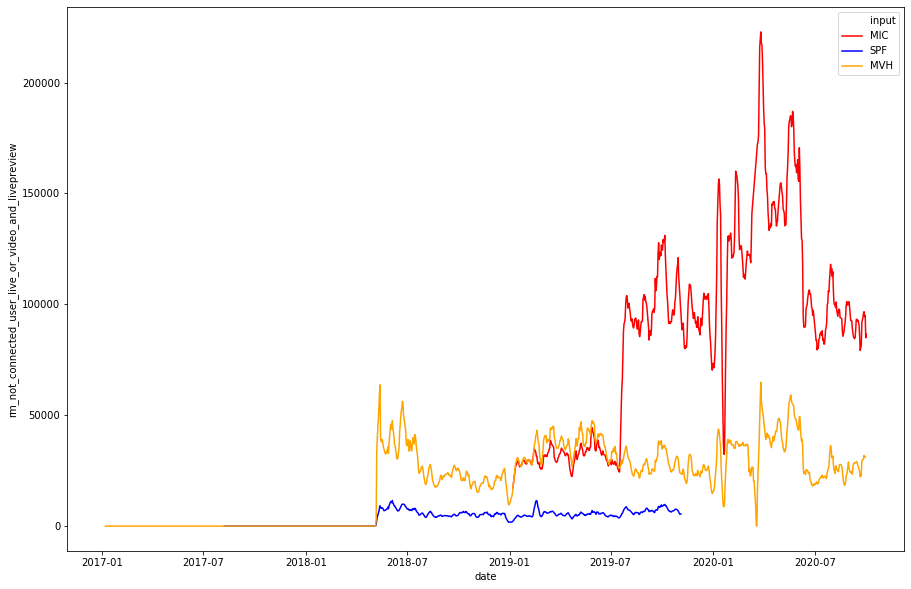

In [82]:
for col in rm_columns:
    plt.figure(figsize = (15,10))
    sns.lineplot(x='date', y=col, hue='input', palette={'SPF':'blue','MVH':'orange','BEAT':'green','MIC': 'red'}, data=df_all)
    plt.show()

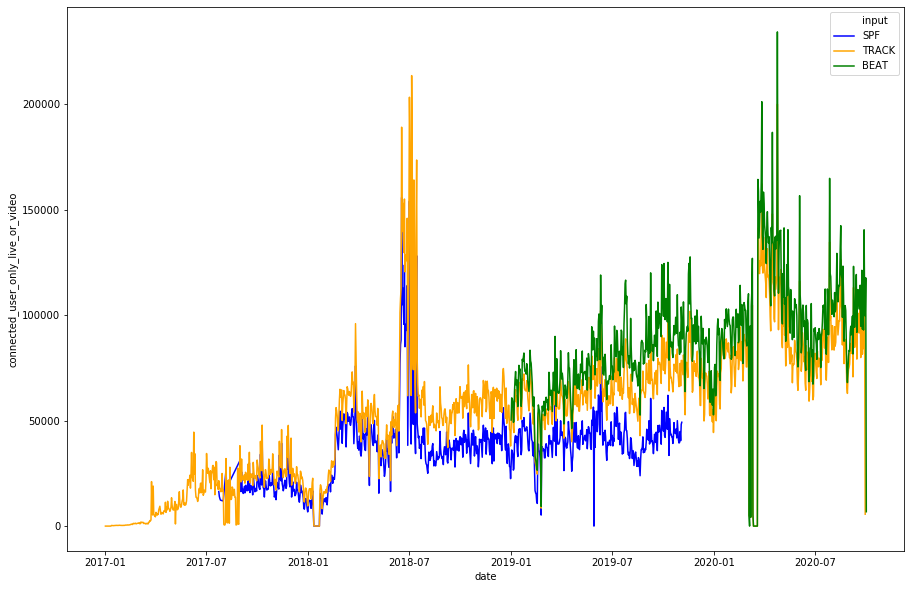

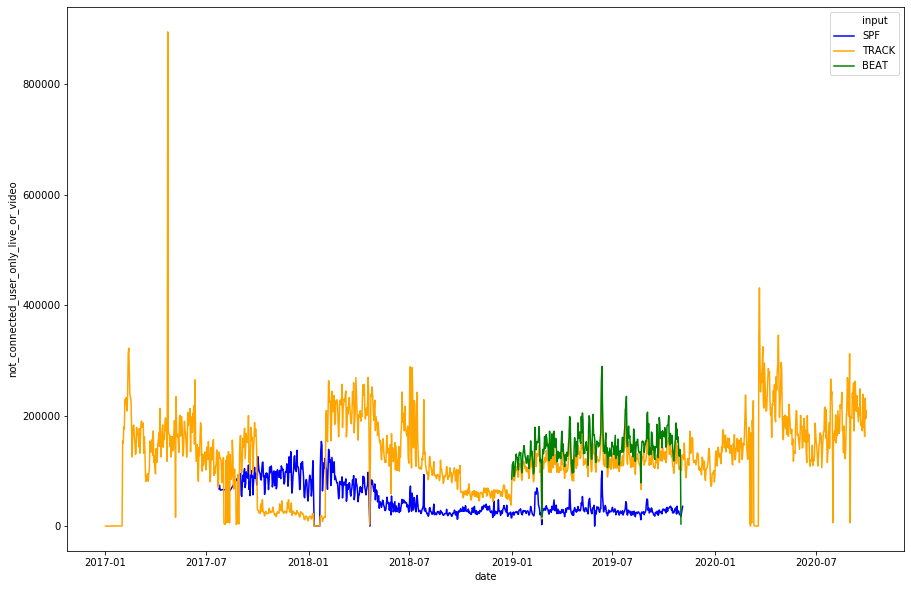

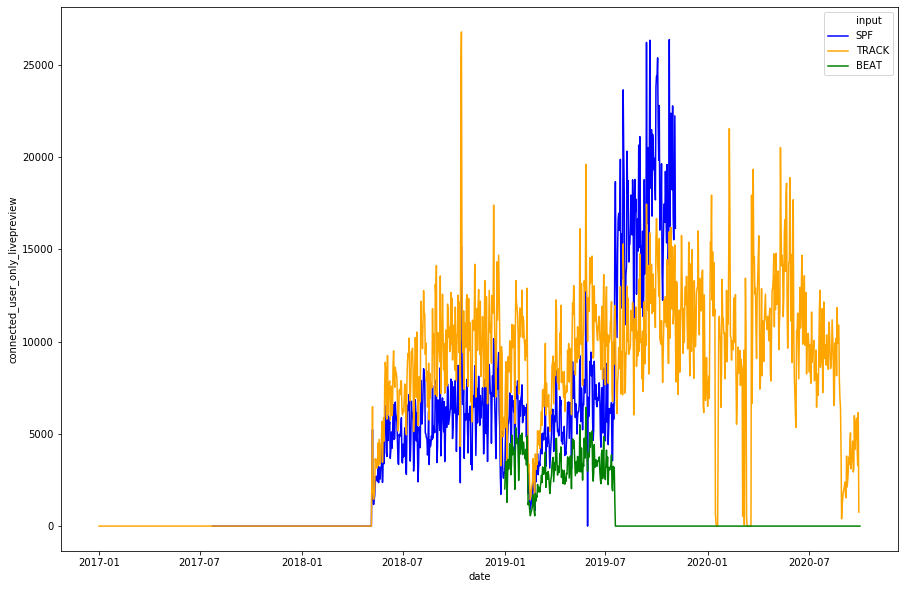

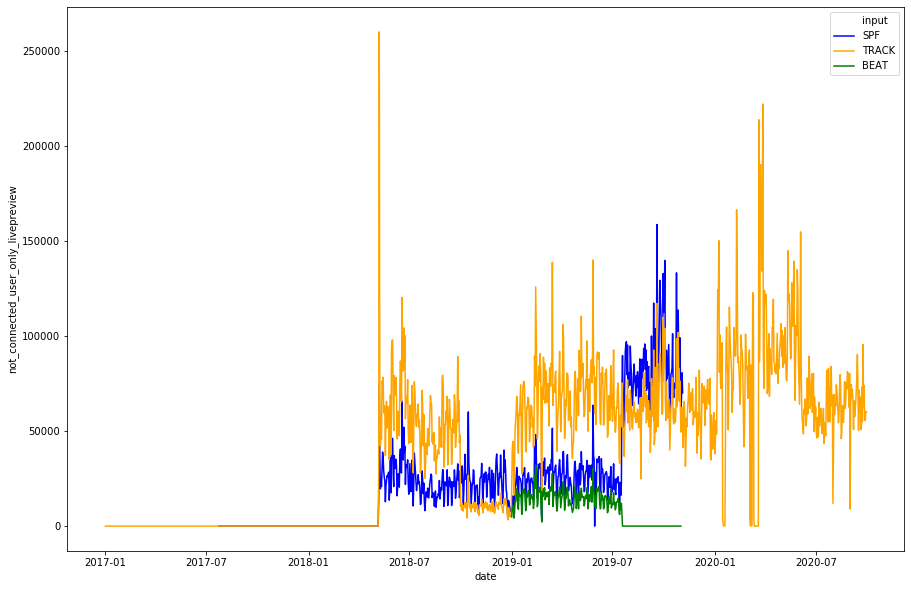

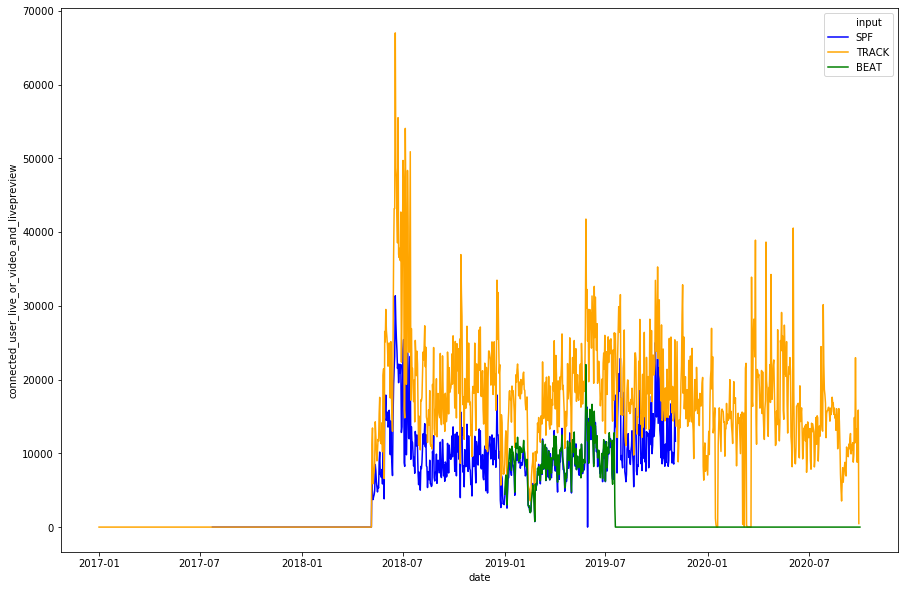

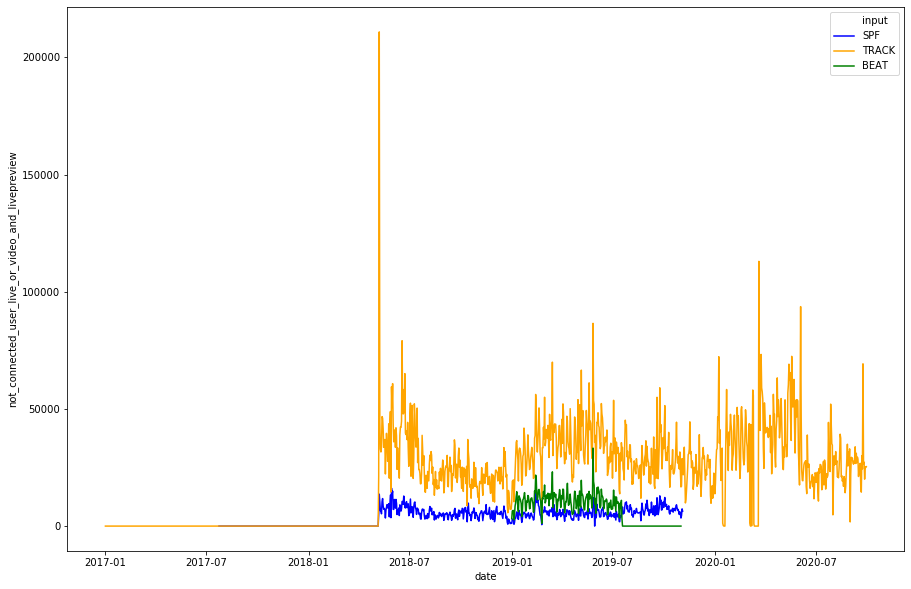

In [22]:
for col in columns:
    plt.figure(figsize = (15,10))
    sns.lineplot(x='date', y=col, hue='input', palette={'SPF':'blue','TRACK':'orange','BEAT':'green'}, data=df_all)
    plt.show()

In [23]:
df_test2 = df_test.melt(['date','input'], var_name='cols',  value_name='vals')
df_test2[~df_test2['vals'].isna()]

NameError: name 'df_test' is not defined

In [ ]:
sns.kdeplot(data=df_test2, x='date', hue="input", multiple="stack")

In [ ]:
export_df(df_before, 'egos_livepreview')